## 5) Vertical edge detection

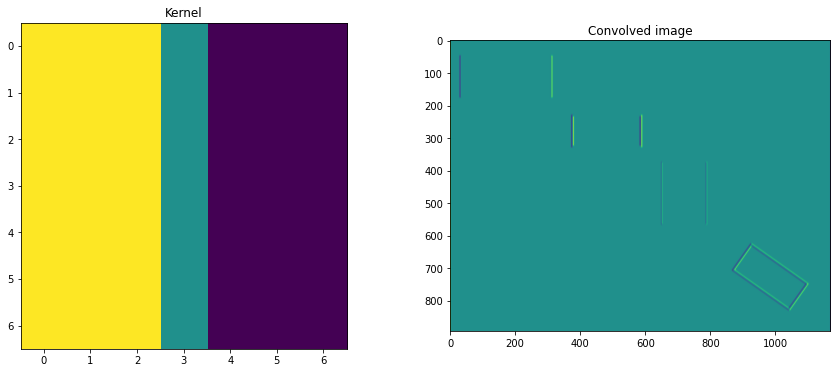

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
from PIL import Image 
from scipy import ndimage
from skimage.io import imread,imshow


img = imread("data/rectangle_2.png",as_gray=True)

k = np.array([[1,1,1,0,-1,-1,-1],[1,1,1,0,-1,-1,-1],[1,1,1,0,-1,-1,-1],[1,1,1,0,-1,-1,-1],[1,1,1,0,-1,-1,-1],[1,1,1,0,-1,-1,-1],[1,1,1,0,-1,-1,-1]])

img2 = ndimage.convolve(img,k,mode="constant",cval=0.0)

fig,axes = plt.subplots(1,2,figsize=(15,6))

axes[0].set_title("Kernel")
axes[0].imshow(k)

axes[1].set_title("Convolved image")
axes[1].imshow(img2)

plt.show()



## 6) Convolved Image into a binary image 

After looking at the result of the convultion I set a threshold of 1 and -1. If the pixel is within this bound then it turned off and there is no line here, else a vertical line was detected. It's performs exactly as expected, but also detects the angled lines in the tilted rectangle in the bottom right 

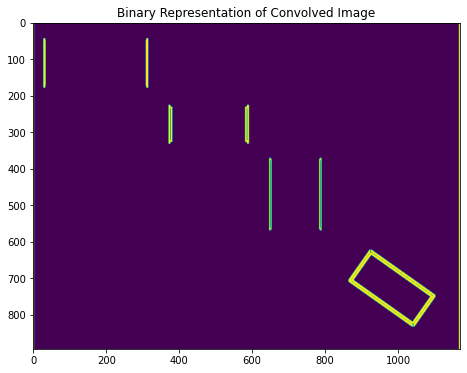

In [5]:
img2[img2 > 1] = True
img2[img2 < -1] = True
img2[img2 != True] = False

fig,axes = plt.subplots(1,1,figsize=(15,6))

axes.set_title("Binary Representation of Convolved Image")
axes.imshow(img2)
plt.show()

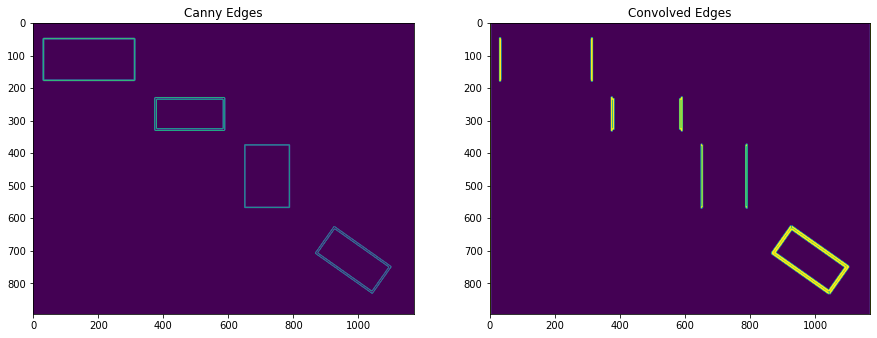

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import skimage
import skimage.feature


iname = "images/rectangle_2.png"
image = skimage.io.imread(fname=iname,as_gray=True)

edges = skimage.feature.canny(image,sigma=.01)

fig,axes = plt.subplots(1,2,figsize=(15,6))

axes[0].set_title("Canny Edges")
axes[0].imshow(edges)
axes[1].set_title("Convolved Edges")
axes[1].imshow(img2)
plt.show()

## 8-14) Finding Corners and Evaluation

In order to work with dvc I moved my corner detection functions in a traditional python file. That python file takes a yaml paramter file and then runs a filter over the input file (I used rectangels2 for all of my work) based on what the parameter file states. It then evalutes the results based on a ground truth file and saves the evaluation to a json file. I have proceeded to print the json file for the evaluation of my two filter pass, my LoG filter pass, and then the detection using a method I found online. 

In [5]:
import json 

with open("combined_summary.json") as fp:
    data = json.load(fp)
    print("Corner Detection using two filters:")
    for key in data:
        print(key,":",data[key])
print()
with open("LoG_summary.json") as fp:
    data = json.load(fp)
    print("Corner Detection using two filters:")
    for key in data:
        print(key,":",data[key])
print()
with open("premade_summary.json") as fp:
    data = json.load(fp)
    print("Corner Detection using online premade code:")
    for key in data:
        print(key,":",data[key])

Corner Detection using two filters:
actual : 16
detected : 28
average distance error : 7.28626789415262
false negative : 0
false positive : 12
true positive : 16
duplicate true : 0

Corner Detection using two filters:
actual : 16
detected : 31
average distance error : 9.984823071124705
false negative : 0
false positive : 15
true positive : 16
duplicate true : 0

Corner Detection using online premade code:
actual : 16
detected : 20
average distance error : 2.4788029725268594
false negative : 0
false positive : 0
true positive : 16
duplicate true : 4
